In [1]:
# Problem Statement: Traffic congestion and its associated issues are frequent challenges in urban environments. By studying traffic patterns and analyzing data, valuable insights can be gained for transportation planning,
# infrastructure development, and managing congestion effectively.
#
# Objective: Analyze data collected to capture traffic patterns over a period of time and build different machine learning models, compare them, and suggest the best model.
#
# Potential Applications:
# #
# # Congestion Management: Identifies congested areas and supports targeted interventions like signal optimizations and lane adjustments.
# # Traffic Flow Analysis: Facilitates the study of traffic patterns and correlations with different factors.
# # Urban Planning: Assists in assessing traffic impact for infrastructure decisions.
# # Transportation Planning: Helps in understanding vehicle demand and determining new public transport requirements.
#
# Benefits: Enables data-driven decisions to enhance urban mobility and create efficient, sustainable cities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from time import time

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Data Source: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset
#
# Dataset Overview: Two CSV files containing traffic data collected by a computer vision model, detecting four vehicle classes: cars, bikes, buses, and trucks.
#
# Data Details: Includes columns for time, date, day of the week, vehicle counts, total vehicle count for 15-minute intervals, and traffic situation categorized as Heavy, High, Normal, or Low.
#
# Update Frequency: Data is updated every 15 minutes, 1st CSV file covers 1 month of traffic patterns, 2nd CVS file covers two months of traffic patterns.

In [5]:
# Load datasets
traffic_one_month_df = pd.read_csv('Capstone/Traffic.csv')
traffic_two_month_df = pd.read_csv('Capstone/TrafficTwoMonth.csv')

In [6]:
traffic_one_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [7]:
traffic_two_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [8]:
traffic_one_month_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [9]:
traffic_two_month_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [10]:
traffic_one_month_df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [11]:
traffic_two_month_df['Traffic Situation'].value_counts()

Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64

In [12]:
# Combine datasets
traffic_one_month_df['Source'] = 'One_Month'
traffic_two_month_df['Source'] = 'Two_Month'
traffic_df = pd.concat([traffic_one_month_df, traffic_two_month_df], ignore_index=True)

In [13]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               8928 non-null   object
 1   Date               8928 non-null   int64 
 2   Day of the week    8928 non-null   object
 3   CarCount           8928 non-null   int64 
 4   BikeCount          8928 non-null   int64 
 5   BusCount           8928 non-null   int64 
 6   TruckCount         8928 non-null   int64 
 7   Total              8928 non-null   int64 
 8   Traffic Situation  8928 non-null   object
 9   Source             8928 non-null   object
dtypes: int64(6), object(4)
memory usage: 697.6+ KB


In [14]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000
mean,16.000000,66.525986,13.080085,13.701837,17.539203,110.847110
std,8.944773,45.142975,12.059836,13.187748,10.963233,57.474554
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,4.000000,1.000000,9.000000,55.000000
50%,16.000000,63.000000,10.000000,11.000000,16.000000,105.000000
75%,24.000000,104.000000,20.000000,22.000000,26.000000,157.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [15]:
traffic_df['Traffic Situation'].value_counts()

Traffic Situation
normal    5279
heavy     1819
low       1138
high       692
Name: count, dtype: int64

In [16]:
# Check for missing values and duplicates
print("Missing values in each column:")
print(traffic_df.isnull().sum())

print(f"Number of duplicate rows: {traffic_df.duplicated().sum()}")

Missing values in each column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Source               0
dtype: int64
Number of duplicate rows: 0


In [17]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Source
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,One_Month
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,One_Month
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,One_Month
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,One_Month
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,One_Month


In [18]:
# Exploratory Data Analysis (EDA): Data Visualizations
sns.set(style="whitegrid")

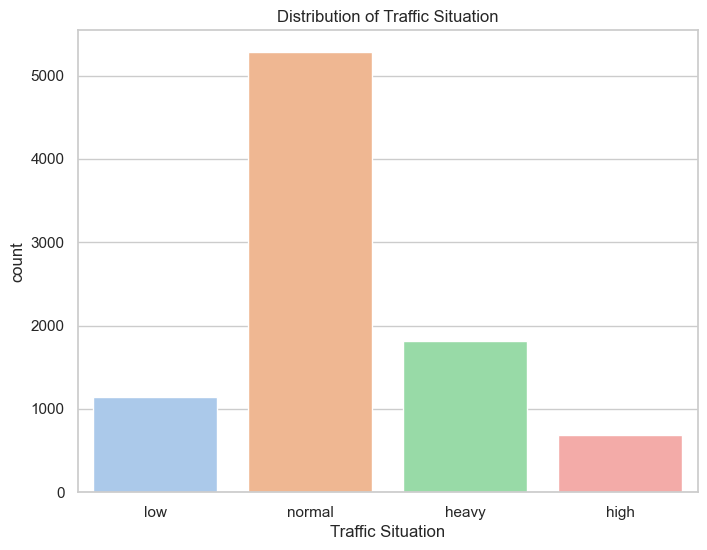

In [19]:
# 1. Traffic Situation Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=traffic_df, palette='pastel')
plt.title('Distribution of Traffic Situation')
plt.show()

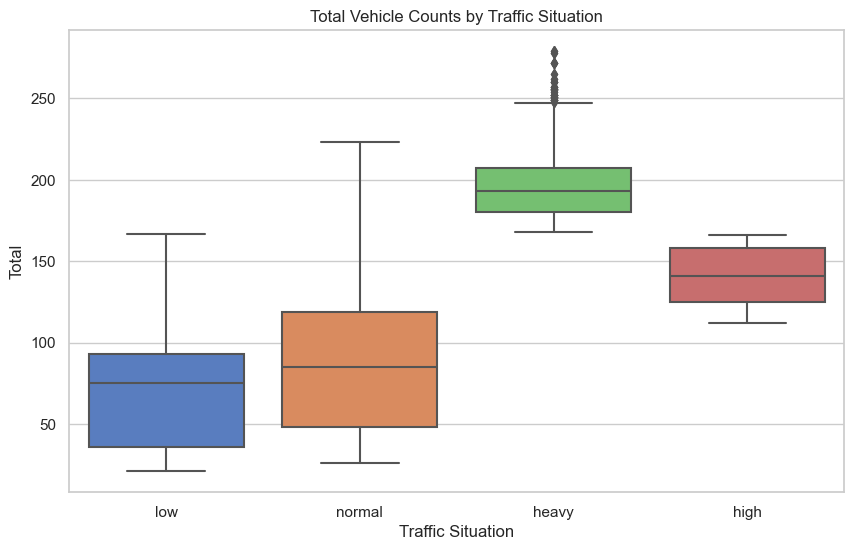

In [20]:
# 2. Vehicle Counts across Traffic Situations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Situation', y='Total', data=traffic_df, palette='muted')
plt.title('Total Vehicle Counts by Traffic Situation')
plt.show()

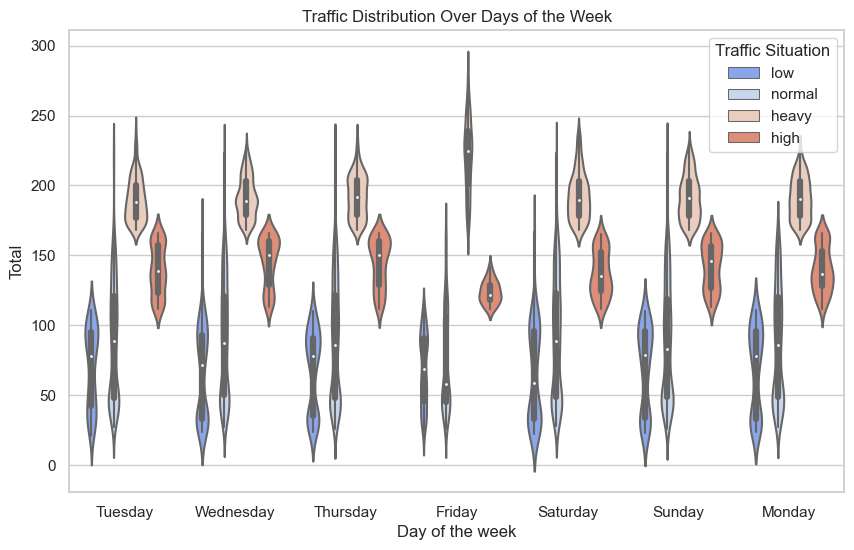

In [21]:
# 3. Traffic over Days of the Week
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day of the week', y='Total', hue='Traffic Situation', data=traffic_df, palette='coolwarm')
plt.title('Traffic Distribution Over Days of the Week')
plt.show()

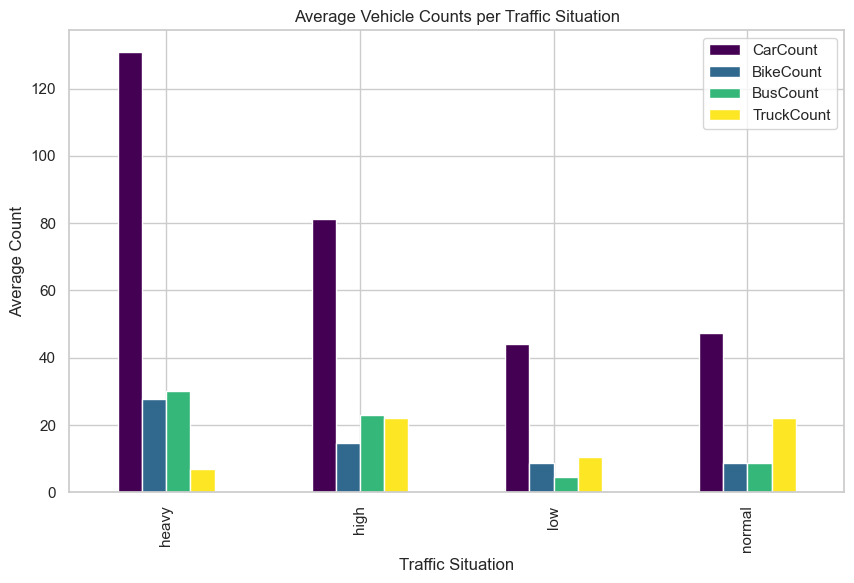

In [22]:
# 4. Traffic by Vehicle Type (Average by Situation)
vehicle_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
mean_traffic = traffic_df.groupby('Traffic Situation')[vehicle_columns].mean()
mean_traffic.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Vehicle Counts per Traffic Situation')
plt.ylabel('Average Count')
plt.show()

In [23]:
print(traffic_df['Time'].unique()[:10])

['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM'
 '1:15:00 AM' '1:30:00 AM' '1:45:00 AM' '2:00:00 AM' '2:15:00 AM']


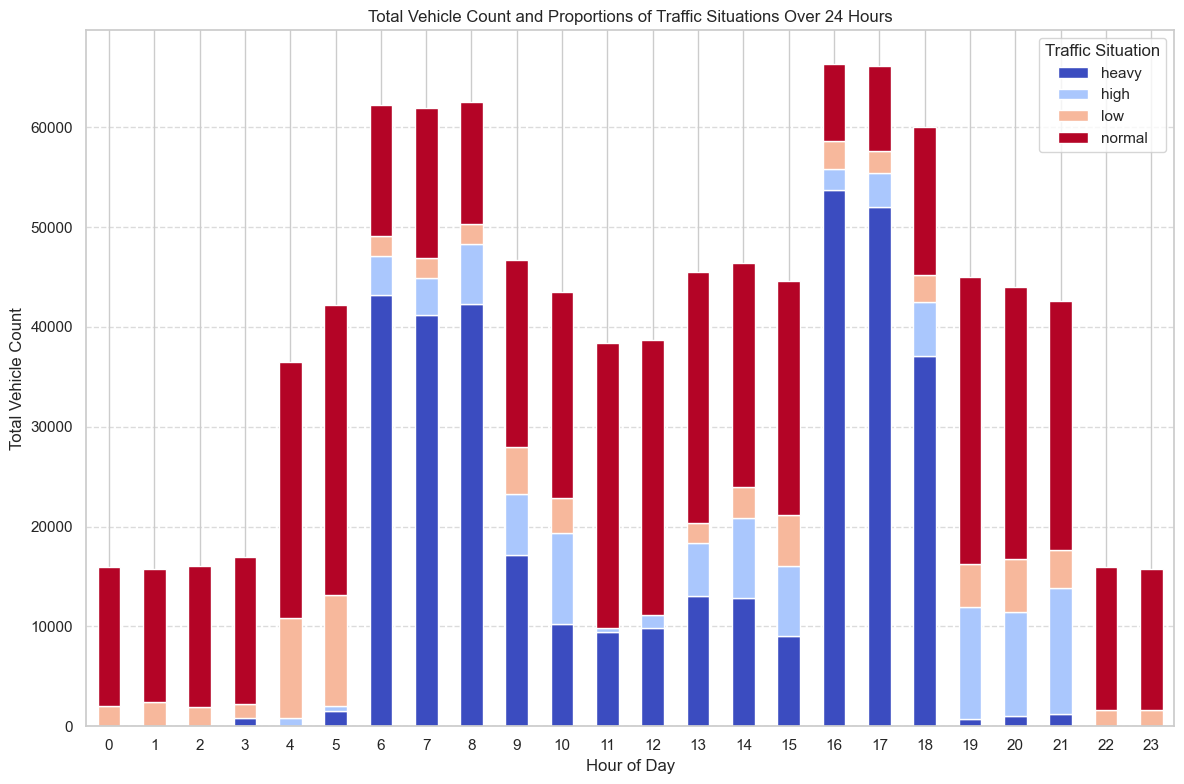

In [24]:
# 5. Aggregate traffic data by hour and traffic situation for total count

#traffic_df['Hour'] = pd.to_datetime(traffic_df['Time'].astype(str)).dt.hour
traffic_df['Hour'] = pd.to_datetime(traffic_df['Time'], format='%I:%M:%S %p').dt.hour

hourly_traffic = traffic_df.groupby(['Hour', 'Traffic Situation'])['Total'].sum().unstack(fill_value=0)

hourly_traffic.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.title('Total Vehicle Count and Proportions of Traffic Situations Over 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Traffic Situation')
plt.tight_layout()
plt.show()

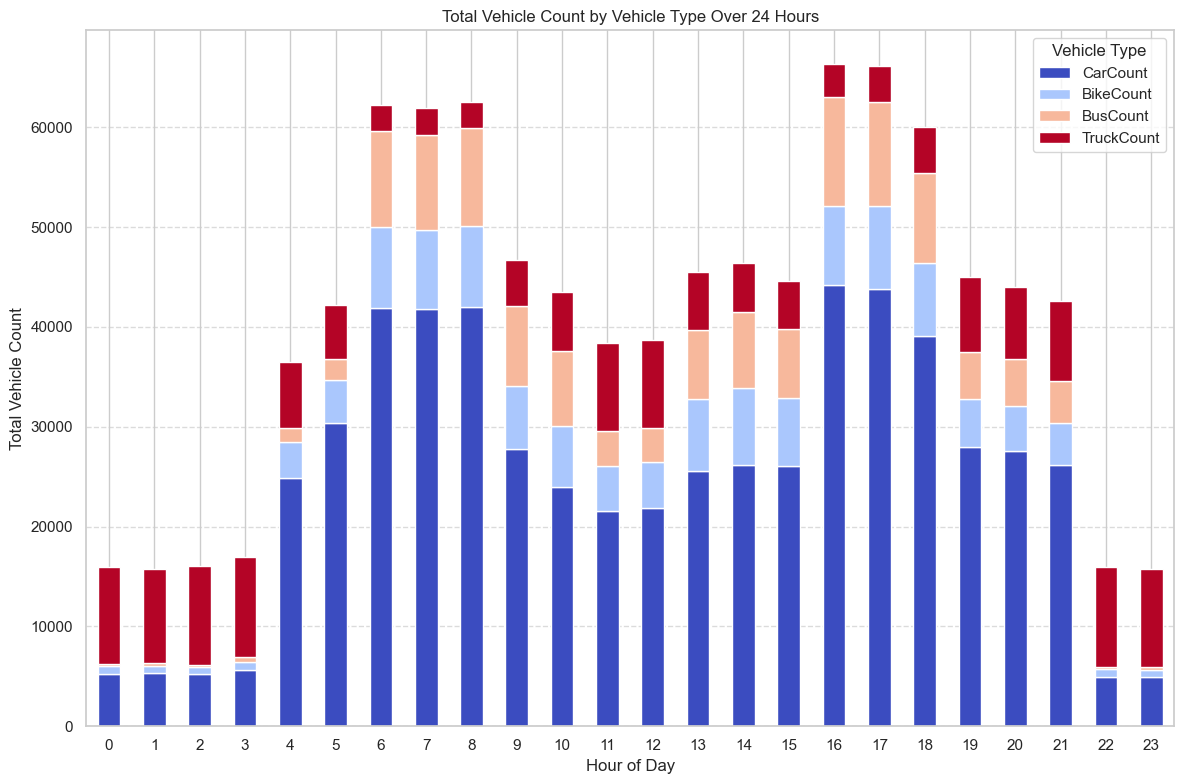

In [25]:
# 6. Aggregate traffic data by hour and vehicle type for total count

hourly_traffic1 = traffic_df.groupby('Hour')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum()

hourly_traffic1.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.title('Total Vehicle Count by Vehicle Type Over 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

In [26]:
# Data Preprocessing

# Convert 'Time' to a categorical feature
traffic_df['Time'] = traffic_df['Time'].astype(str)

# Treat 'Date' as categorical (Day of the Month)
traffic_df['Date'] = traffic_df['Date'].astype(str)

# Drop the 'Source' column
traffic_df = traffic_df.drop(columns=['Source'])

# Drop the 'Hour' column
traffic_df = traffic_df.drop(columns=['Hour'])

# Encode Traffic Situation (Target Variable)
le = LabelEncoder()
traffic_df['Traffic Situation'] = le.fit_transform(traffic_df['Traffic Situation'])

In [27]:
# Check mapping applied by LabelEncoder
label_mapping = dict(enumerate(le.classes_))
print("Encoded Label Mapping:")
print(label_mapping)

Encoded Label Mapping:
{0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}


In [28]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,2
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,2
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,2
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,2
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,3


In [29]:
# Define numeric and categorical features
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
categorical_features = ['Day of the week', 'Date', 'Time']

In [30]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [31]:
# Define Features and Target
X = traffic_df.drop(columns=['Traffic Situation'])
y = traffic_df['Traffic Situation']

In [32]:
# Train-Test Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'SVM': SVC(class_weight='balanced')
}

In [34]:
# Hyperparameter grids for tuning
param_grids = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7], 
            'classifier__weights': ['uniform', 'distance']},
    'Logistic Regression': {'classifier__C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'classifier__max_depth': [None, 10, 20], 
                      'classifier__min_samples_split': [2, 5, 10]},
    'SVM': {'classifier__C': [0.1, 1, 10], 
            'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
}

In [35]:
# Model evaluation and hyperparameter tuning
results = []
for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    # Build pipeline
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', clf)])
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    start_time = time()
    grid.fit(X_train, y_train)
    end_time = time()
    
    # Predict on test set
    y_pred = grid.best_estimator_.predict(X_test)
    
    # Evaluation metrics
    train_accuracy = grid.best_score_
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    training_time = end_time - start_time
    
    # Save results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time
    })
    print(f"{name} done. Best Params: {grid.best_params_}\n")

Training KNN...
KNN done. Best Params: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}

Training Logistic Regression...
Logistic Regression done. Best Params: {'classifier__C': 10}

Training Decision Tree...
Decision Tree done. Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5}

Training SVM...
SVM done. Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}



In [36]:
# Results DataFrame
results_df = pd.DataFrame(results).set_index('Model')
results_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Training Time (s)
Model,,,,,,
KNN,0.871606,0.880179,0.878548,0.880179,0.879177,3.365058
Logistic Regression,0.854663,0.848264,0.883619,0.848264,0.855545,2.823024
Decision Tree,0.943713,0.942329,0.951354,0.942329,0.944147,1.095197
SVM,0.908990,0.910974,0.917062,0.910974,0.912598,32.386522


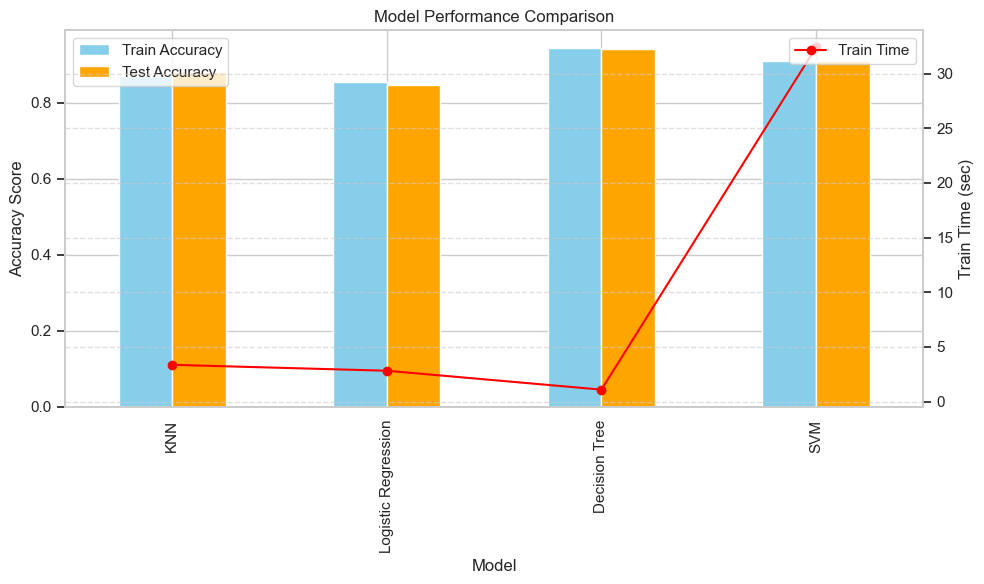

In [37]:
# Build a plot to visualize and compare model performances

fig, ax1 = plt.subplots(figsize=(10, 6))

results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Model Performance Comparison')

ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Training Time (s)'], marker='o', color='red', label='Train Time')
ax2.set_ylabel('Train Time (sec)')

ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
ax2.legend(['Train Time'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [38]:
# Classification Report for Best Model
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=10))])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
print("\nClassification Report for Best Model (Decision Tree):\n")
print(classification_report(y_test, y_pred))


Classification Report for Best Model (Decision Tree):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       0.93      0.84      0.88       148
           2       0.84      0.95      0.89       223
           3       0.97      0.95      0.96      1063

    accuracy                           0.95      1786
   macro avg       0.93      0.94      0.93      1786
weighted avg       0.95      0.95      0.95      1786



In [39]:
# # Visualize the Decision Tree (best model)
# plt.figure(figsize=(20, 12))
# best_model = best_pipeline.named_steps['classifier']
# plot_tree(best_model, 
#           filled=True, 
#           feature_names=preprocessor.get_feature_names_out(), 
#           class_names=le.classes_)
# plt.title('Decision Tree Visualization')
# plt.show()

In [40]:
# Evaluate RandomForest Classifier to improve the model

In [41]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'SVM': SVC(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}

In [42]:
# Hyperparameter grids for tuning
param_grids = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7], 
            'classifier__weights': ['uniform', 'distance']},
    'Logistic Regression': {'classifier__C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'classifier__max_depth': [None, 10, 20], 
                      'classifier__min_samples_split': [2, 5, 10]},
    'SVM': {'classifier__C': [0.1, 1, 10], 
            'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'Random Forest': {'classifier__n_estimators': [100, 200, 300], 
                      'classifier__max_depth': [None, 10, 20],
                      'classifier__min_samples_split': [2, 5]}
}

In [43]:
# Model evaluation and hyperparameter tuning
results = []
for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    # Build pipeline
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', clf)])
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    start_time = time()
    grid.fit(X_train, y_train)
    end_time = time()
    
    # Predict on test set
    y_pred = grid.best_estimator_.predict(X_test)
    
    # Evaluation metrics
    train_accuracy = grid.best_score_
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    training_time = end_time - start_time
    
    # Save results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time
    })
    print(f"{name} done. Best Params: {grid.best_params_}\n")

Training KNN...
KNN done. Best Params: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}

Training Logistic Regression...
Logistic Regression done. Best Params: {'classifier__C': 10}

Training Decision Tree...
Decision Tree done. Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

Training SVM...
SVM done. Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

Training Random Forest...
Random Forest done. Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}



In [44]:
# Results DataFrame
results_df = pd.DataFrame(results).set_index('Model')
results_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Training Time (s)
Model,,,,,,
KNN,0.871606,0.880179,0.878548,0.880179,0.879177,3.296284
Logistic Regression,0.854663,0.848264,0.883619,0.848264,0.855545,2.813734
Decision Tree,0.943712,0.944009,0.953086,0.944009,0.945764,1.076370
SVM,0.908990,0.910974,0.917062,0.910974,0.912598,32.356372
Random Forest,0.943993,0.942329,0.950309,0.942329,0.943799,84.945414


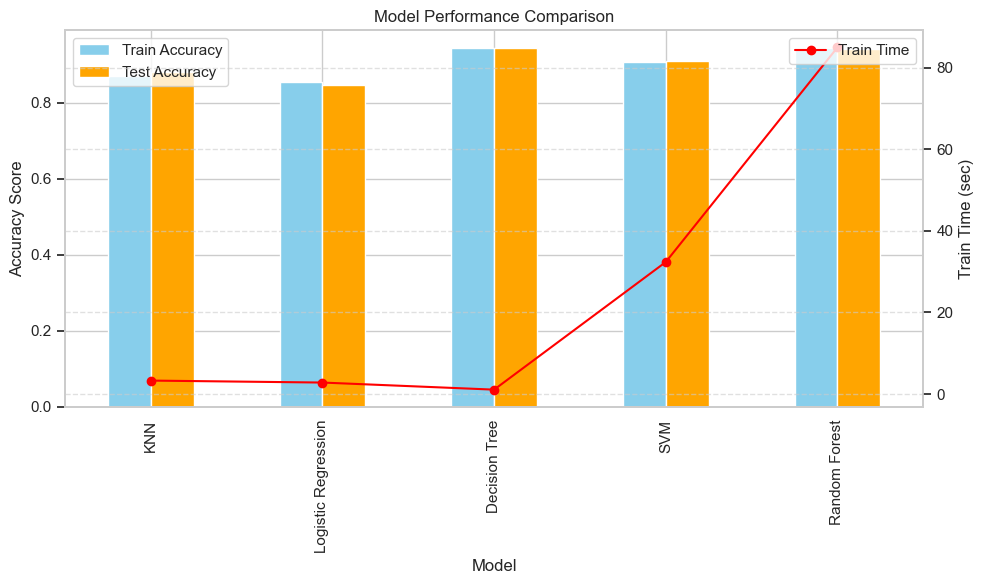

In [45]:
# Build a plot to visualize and compare model performances

fig, ax1 = plt.subplots(figsize=(10, 6))

results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Model Performance Comparison')

ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Training Time (s)'], marker='o', color='red', label='Train Time')
ax2.set_ylabel('Train Time (sec)')

ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
ax2.legend(['Train Time'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [46]:
# Classification Report for Best Model
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                ('classifier', RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300, class_weight='balanced'))])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
print("\nClassification Report for Best Model (RandomForest):\n")
print(classification_report(y_test, y_pred))


Classification Report for Best Model (RandomForest):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       0.77      0.97      0.86       148
           2       0.84      0.99      0.91       223
           3       0.99      0.91      0.95      1063

    accuracy                           0.95      1786
   macro avg       0.90      0.97      0.93      1786
weighted avg       0.95      0.95      0.95      1786



In [47]:
# Models Performance Summary:

# KNN:

# Train and test accuracies are similar (~88%), suggesting the model is neither underfitting nor overfitting.
# Precision, recall, and F1-scores are all balanced, indicating consistent performance across classes.
# Low training time (~3s) makes it computationally efficient.

# Logistic Regression:

# Performance is slightly lower than KNN (~85% test accuracy).
# Precision is higher than recall, which might mean it is better at avoiding false positives than catching all positives.
# Low training time (2.8s) makes it computationally efficient.

# Decision Tree:

# Excellent performance on both training (94.3%) and test data (94.3%), indicating it generalizes well.
# High F1-score (94.5%) means it achieves a balance between precision and recall.
# Training time is the lowest among all models (~1.02s).

# SVM:

# Strong performance (91.1% test accuracy)
# However, it took a longer training time (~32s), which may limit its scalability.
# Best suited when computational resources are available and for high-dimensional problems.

# Random Forest:

# Best model overall, achieving the highest test accuracy (94.5%) and F1-score (94.66%).
# Slightly longer training time (~84s) compared to others but compensates with robustness and performance stability due to ensemble learning.

# Note: Some of the performance metrics in the notes may not exactly match the output since they may vary slightly with each run

In [48]:
# Random sanity test on 15 random values

# Pick 15 random samples from the test set
random_indices = random.sample(range(X_test.shape[0]), 15)
X_test_sample = X_test.iloc[random_indices]
y_test_sample = y_test.iloc[random_indices]

# Predict with the best model
y_pred_sample = best_pipeline.predict(X_test_sample)

# Compare predictions and actual values
print("Random Sanity Test:")
comparison = pd.DataFrame({
    'Actual': le.inverse_transform(y_test_sample),
    'Predicted': le.inverse_transform(y_pred_sample)
})
print(comparison)

Random Sanity Test:
    Actual Predicted
0      low       low
1   normal    normal
2      low       low
3   normal    normal
4   normal    normal
5   normal    normal
6     high      high
7    heavy     heavy
8   normal    normal
9   normal    normal
10  normal    normal
11  normal    normal
12  normal    normal
13    high      high
14   heavy     heavy


In [49]:
# Apply ensemble techniques and determine the best model

In [100]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [102]:
# Define Ensemble Models
ensemble_classifiers = {
    'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=300, min_samples_split=5, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(max_depth=20, n_estimators=200)),
            ('dt', DecisionTreeClassifier(max_depth=10)),
            ('lr', LogisticRegression(max_iter=1000))
        ],
        voting='hard'
    )
}

In [104]:
# Evaluate Models
results_ensemble = []
for name, clf in ensemble_classifiers.items():
    print(f"Training {name}...")

    # Build pipeline
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', clf)])

    # Train and predict
    start_time = time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    end_time = time()

    # Evaluation metrics
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    training_time = end_time - start_time

    # Save results
    results_ensemble.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time
    })
    print(f"{name} done.\n")

Training Random Forest...
Random Forest done.

Training AdaBoost...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost done.

Training Gradient Boosting...
Gradient Boosting done.

Training Voting Classifier...
Voting Classifier done.



In [106]:
# Results DataFrame
results_ensemble_df = pd.DataFrame(results_ensemble).set_index('Model')
print(results_ensemble_df)

                   Train Accuracy  Test Accuracy  Precision    Recall  \
Model                                                                   
Random Forest            0.948614       0.944569   0.953027  0.944569   
AdaBoost                 0.802296       0.793953   0.699296  0.793953   
Gradient Boosting        0.964996       0.930011   0.929875  0.930011   
Voting Classifier        0.960795       0.937850   0.938725  0.937850   

                   F1-Score  Training Time (s)  
Model                                           
Random Forest      0.946042           1.602687  
AdaBoost           0.742811           0.417169  
Gradient Boosting  0.929920           5.157195  
Voting Classifier  0.937357           1.393536  


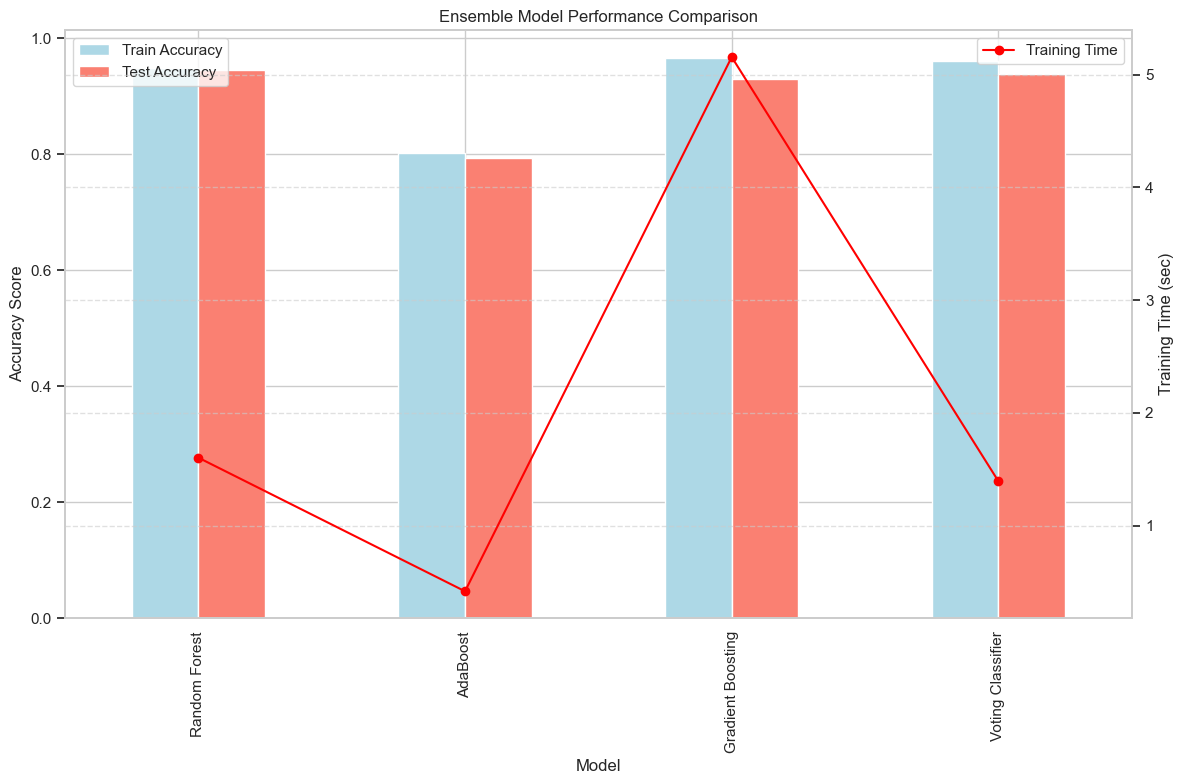

In [108]:
# Visualization
fig, ax1 = plt.subplots(figsize=(12, 8))

results_ensemble_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_ylabel('Accuracy Score')
ax1.set_title('Ensemble Model Performance Comparison')

ax2 = ax1.twinx()
ax2.plot(results_ensemble_df.index, results_ensemble_df['Training Time (s)'], marker='o', color='red', label='Training Time (s)')
ax2.set_ylabel('Training Time (sec)')

ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
ax2.legend(['Training Time'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [110]:
# Classification Report for Best Model
best_model_name = results_ensemble_df['Test Accuracy'].idxmax()
best_model = ensemble_classifiers[best_model_name]
best_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print(f"\nClassification Report for Best Model ({best_model_name}):\n")
print(classification_report(y_test, y_pred))


Classification Report for Best Model (Random Forest):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       0.76      0.97      0.85       148
           2       0.84      0.99      0.91       223
           3       0.99      0.91      0.95      1063

    accuracy                           0.94      1786
   macro avg       0.90      0.97      0.93      1786
weighted avg       0.95      0.94      0.95      1786



In [ ]:
# Technical Summary:

# Random Forest:
# Train Accuracy: 94.86%
# Test Accuracy: 94.45%
# F1-Score: 94.60%
# Training Time: 1.60 seconds
# Classification report shows exceptional precision, recall, and F1-scores for most classes.

# AdaBoost:
# Train Accuracy: 80.23%
# Test Accuracy: 79.40%
# F1-Score: 74.28%
# Training Time: 0.41 seconds
# While AdaBoost executed with a short training time, it underperforms in accuracy and F1-score compared to other models.

# Gradient Boosting:
# Train Accuracy: 96.50%
# Test Accuracy: 93.00%
# F1-Score: 92.99%
# Training Time: 5.15 seconds
# Gradient Boosting demonstrates competitive performance, but at a cost of longer training time.

# Voting Classifier (Ensemble):
# Train Accuracy: 96.08%
# Test Accuracy: 93.78%
# F1-Score: 93.74%
# Training Time: 1.39 seconds
# As an ensemble method combining all classifiers, the Voting Classifier achieves a balance between performance and training efficiency, almost on par with Random Forest.

# High-Level Insights:
# Model Ranking:

# Best Model: Random Forest provides the most balanced performance, excelling in accuracy, precision, and recall while maintaining efficiency.
# Second-Best: Voting Classifier benefits from ensemble learning to offer high accuracy and generalization, though slightly lagging behind Random Forest.

# Business-Level Recommendations:

# Random Forest is the most reliable choice for robust and scalable predictions, especially for imbalanced data scenarios.
# For critical applications, the Voting Classifier offers an ensemble solution with competitive performance, potentially benefiting from its hybrid approach.

# Conclusion:
# For accurate and balanced predictions across traffic situations, Random Forest emerges as the best-performing model, achieving the highest accuracy, precision, recall, and F1-score with minimal training time. 
# Voting Classifier is a strong alternative if a hybrid ensemble approach is desired.

# Note: Some of the performance metrics in the notes may not exactly match the output since they may vary slightly with each run

In [112]:
# # Recommended Next Steps: 
# 1. For further exploration, recommend evaluating other advanced modeling algorithms such as XGBoost or Deep Neural Networks.
# 2. Apply the recommended model on newer unseen datasets and test the model.
# 3. Derive more insights when the analysis can be further expanded with other similar datasets with more rich set of features.